<a href="https://colab.research.google.com/github/L-Shyamal/ear-echo/blob/main/Ear_Echo/Ear_Echo(17_23).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [19]:
#reading data from the stored CSV file
TF_data = pd.read_csv('/content/drive/MyDrive/SMU project/17-23/TF_DataLahiru.csv')
TF_data_Dulaj = pd.read_csv('/content/drive/MyDrive/SMU project/17-23/TF_DataDulaj.csv')
TF_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
0,-3.441414,-4.155031,-3.401789,-3.047587,-3.217697,-3.200470,-2.997669,-3.131159,-2.638461,-2.738806,...,0.620195,0.686535,0.598675,0.624180,0.495984,0.722363,0.286490,0.443644,0.164685,0.0
1,-2.206420,-2.417357,-2.295175,-2.193039,-2.782561,-2.389806,-2.425480,-2.813159,-2.301188,-2.177666,...,1.584475,1.208559,1.206656,0.937060,1.008056,0.765729,0.763304,1.357002,0.388683,1.0
2,0.018795,-0.294400,0.052374,0.191565,-0.085209,-0.076866,0.212526,-0.121708,0.357140,0.169254,...,0.709038,0.839723,0.882795,0.564922,0.754013,0.623744,0.591379,0.663856,0.297256,2.0
3,-0.033686,0.005855,0.033384,0.123506,-0.019450,0.133469,0.149939,0.177062,0.146895,0.100063,...,1.681698,1.233098,1.393204,1.077275,1.200056,1.164166,0.873713,1.434530,0.369317,3.0
4,-5.089035,-5.995880,-4.838436,-4.852411,-4.558750,-4.567114,-4.777625,-4.706657,-3.867955,-4.325106,...,0.861669,0.890235,0.916750,0.717585,0.722445,0.764159,0.969319,0.832727,0.392432,4.0


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [75]:
# Seperating Data and Labels

#print(TF_data['720'].value_counts())

TF_data.drop(TF_data[TF_data['1440'] >= 5].index, inplace = True)
print(TF_data['1440'].value_counts())

# Seperating Data and Labels

X = TF_data.drop(columns='1440',axis=1)
Y = TF_data['1440']

# X_after_test , Y_after_test = X.iloc[228:] , Y.iloc[228:]
# X , Y = X.iloc[:228] , Y.iloc[:228]
# Train and Test Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size=0.2 ,stratify=Y, random_state=2)
X_train,X_validation,Y_train,Y_validation = train_test_split(X_train,Y_train , test_size=0.16 ,stratify=Y_train, random_state=1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_after_test = X_after_test.astype('float32')

print("# of training data =",X_train.shape[0])
print("# of Validation data =",X_validation.shape[0])
print("# of testdata =",X_test.shape[0])


0.0    55
1.0    55
2.0    55
3.0    55
4.0    55
Name: 1440, dtype: int64
# of training data = 184
# of Validation data = 36
# of testdata = 55


In [76]:
TF_data_Dulaj.drop(TF_data_Dulaj[TF_data_Dulaj['1440'] >= 5].index, inplace = True)
print(TF_data_Dulaj['1440'].value_counts())

# Seperating Data and Labels

X_2nd = TF_data_Dulaj.drop(columns='1440',axis=1)
Y_2nd = TF_data_Dulaj['1440']

0.0    20
1.0    20
2.0    20
3.0    20
4.0    20
Name: 1440, dtype: int64


## Task List

Here the following facial expressions will be represented as given below .<br><br>
1  = No Action <br>
2  = Mouth Opened <br>
3  = Pull the lips conner Left<br>
4  = Pull the lips conner Right<br>
5  = Eye Brows Up <br>

In [39]:
task_list = ['No Action','Mouth Opened','Pull the lips conner Left','Pull the lips conner Right','Eye Brows Up']

In [59]:
#tf.keras.layers.LeakyReLU(alpha=0.01)

model = Sequential()
model.add(tf.keras.layers.Dense(720*2, activation= tf.keras.layers.LeakyReLU(alpha=0.02), input_shape=(720*2,)))
model.add(tf.keras.layers.Dense(250, activation= tf.keras.layers.LeakyReLU(alpha=0.02)))
model.add(tf.keras.layers.Dense(120, activation= 'relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))


print(model.summary())

print("Training Run")
# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.0008, momentum=0.08)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,Y_train, epochs=1000, batch_size=32,validation_data=(X_validation, Y_validation))


print("\n"*5)
print("Test Run")

Loss, acc = model.evaluate(X_test,Y_test)
print("Test Loss:", Loss)
print("Accuracy = ", (acc * 100.0), "%")


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1440)              2075040   
                                                                 
 dense_33 (Dense)            (None, 250)               360250    
                                                                 
 dense_34 (Dense)            (None, 120)               30120     
                                                                 
 dense_35 (Dense)            (None, 5)                 605       
                                                                 
Total params: 2,466,015
Trainable params: 2,466,015
Non-trainable params: 0
_________________________________________________________________
None
Training Run
Epoch 1/1000
6/6 [==============================] - 1s 42ms/step - loss: 2.6610 - accuracy: 0.2880 - val_loss: 1.2816 - val_accuracy: 0.4722
Epoch 2/1000
6/6 

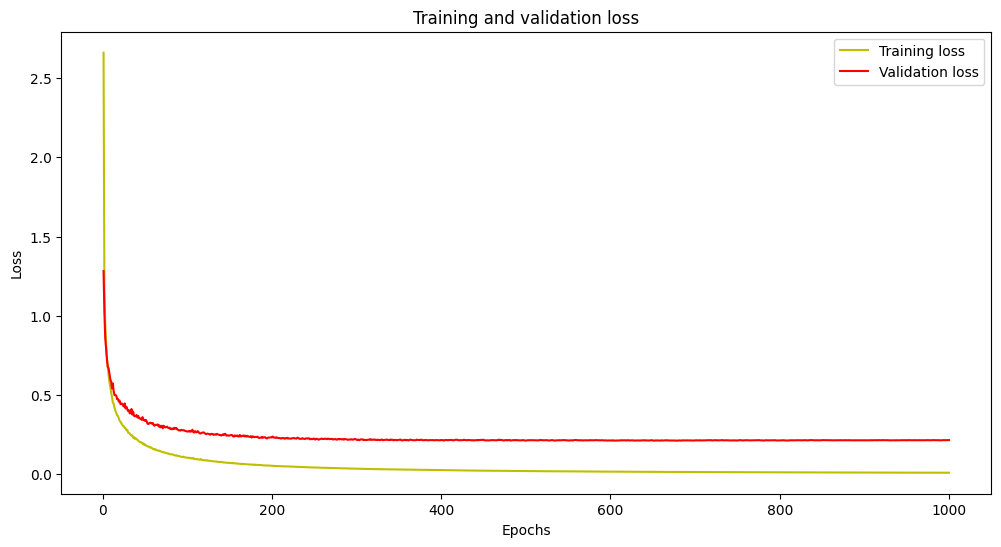

In [60]:
#plot the training and validation accuracy and loss at each epoch
plt.figure(figsize=(12, 6))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

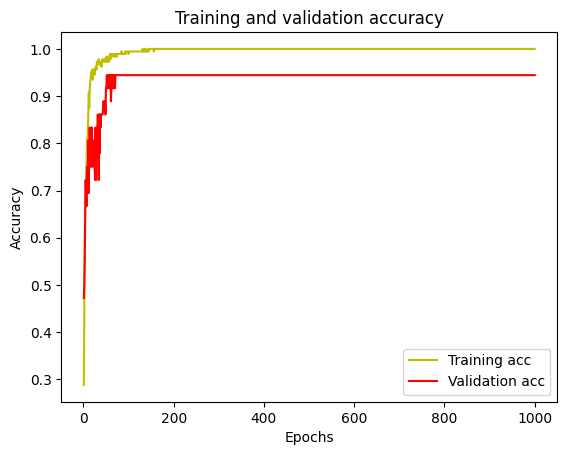

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [77]:
Y_predict = model.predict(X_test)
#print(len(Y_test) , len(Y_predict))
print ("Test Label--------------Predicted LAbel---------------")
for i in range(len(Y_predict)):
    p = np.argmax(Y_predict,axis= 1)[i]
    t = Y_test.iloc[i]
    print(t,"                        ",p,"            ",(int(t)==p))

2/2 [==============================] - 0s 7ms/step
Test Label--------------Predicted LAbel---------------
1.0                          1              True
3.0                          3              True
0.0                          0              True
2.0                          2              True
0.0                          0              True
3.0                          3              True
4.0                          4              True
1.0                          1              True
4.0                          4              True
1.0                          1              True
0.0                          0              True
0.0                          4              False
2.0                          2              True
3.0                          3              True
4.0                          4              True
1.0                          1              True
2.0                          2              True
3.0                          3              True
3.0        

In [78]:
Y_prediction = np.argmax(Y_predict,axis= 1).astype('float32')

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_prediction)

0.9454545454545454

In [79]:
Y_prediction_2nd = np.argmax(model.predict(X_2nd),axis= 1).astype('float32')


accuracy_score(Y_2nd,Y_prediction_2nd)

4/4 [==============================] - 0s 3ms/step


0.2

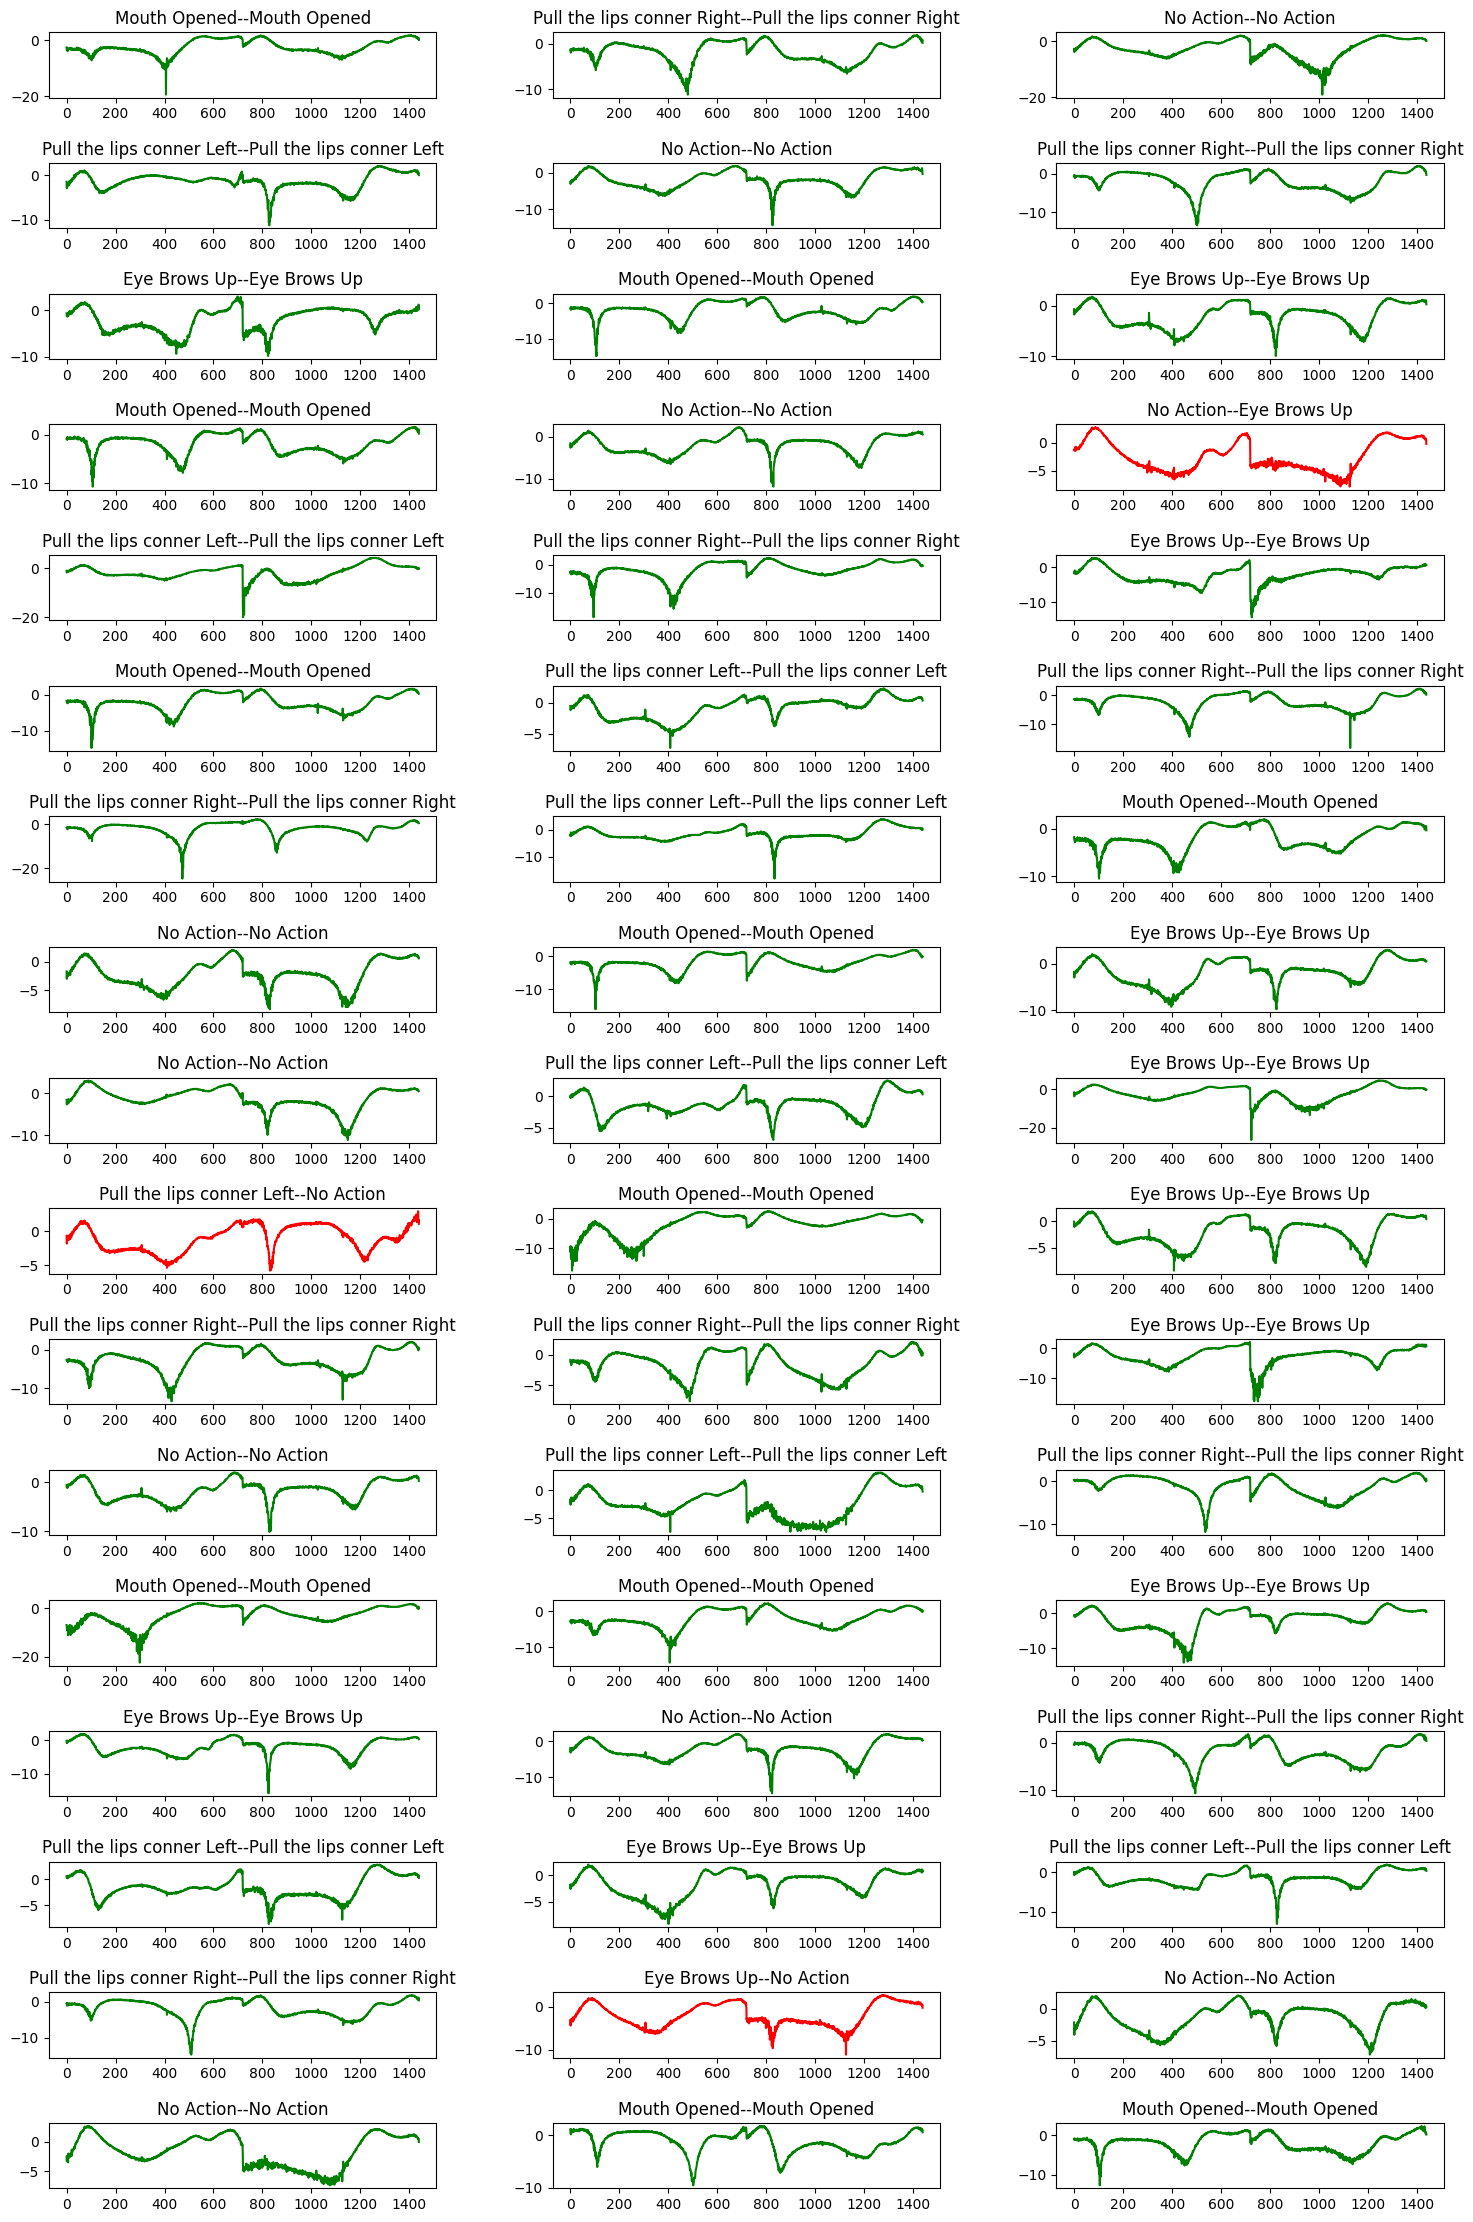

In [82]:
f = np.arange(720*2)
fig, axs = plt.subplots(17,3, figsize=(18, 28))
fig.subplots_adjust(hspace = 1, wspace=0.3)

axs = axs.ravel()

for i in range(51):

    test_name = task_list[int(Y_test.iloc[i])]
    predict_name = task_list[(np.argmax(Y_predict,axis= 1)[i])]

    if test_name==predict_name:col = 'green'
    else: col = 'red'
    axs[i].plot(f,X_test.iloc[i],color=col)
    axs[i].set_title(test_name + "--"+predict_name)

Confusion Matrix

<Axes: >

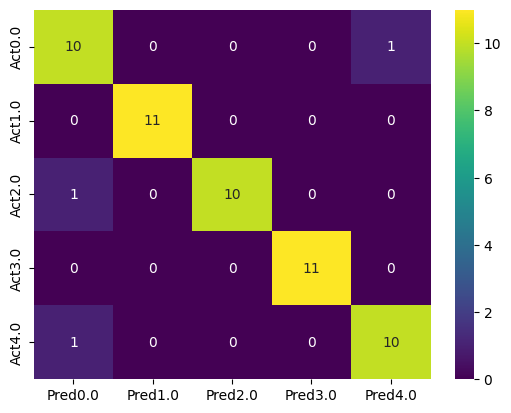

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn


def plot_ConfM(ytest,ypredict):
  labels = unique_labels(Y_test)
  col = [f'Pred{lab}' for lab in labels]
  row = [f'Act{lab}' for lab in labels]

  table = pd.DataFrame(confusion_matrix(ytest,ypredict) , columns=col , index=row)

  return seaborn.heatmap(table , annot=True, fmt ='d' , cmap='viridis')

plot_ConfM(Y_test,Y_prediction)

In [16]:
#model.save('/content/drive/MyDrive/Ear Echo/TF model-NewTaskList')

1/1 [==============================] - 0s 26ms/step - loss: 0.2228 - accuracy: 0.9286


(0.0, 1.1)

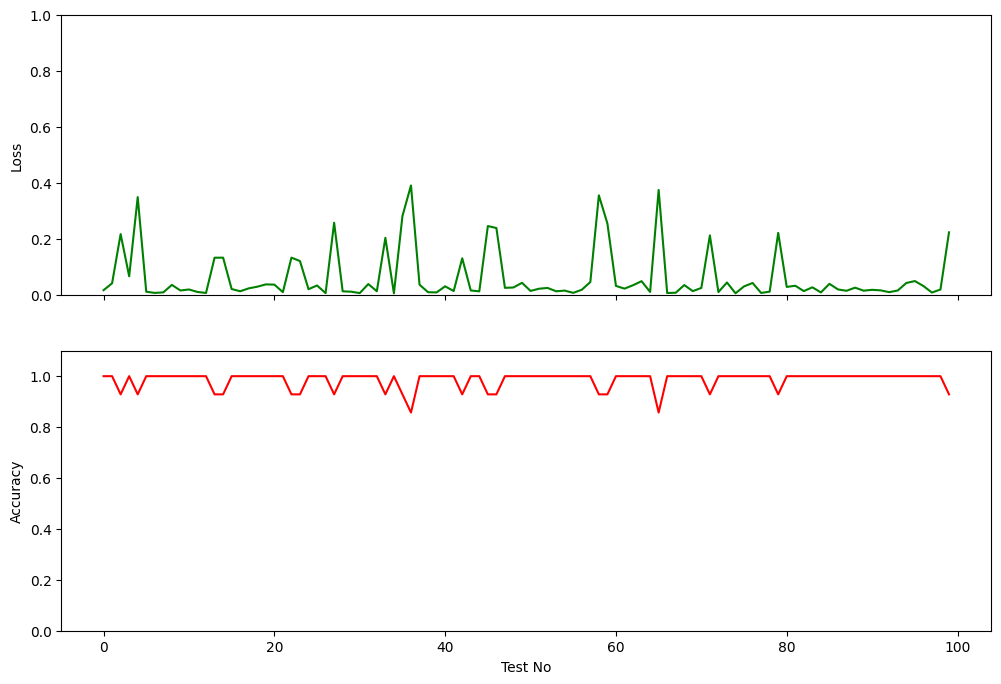

In [66]:
TestSet = []
for t in range(100):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size=0.05 ,stratify=Y, random_state=t)

  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  loss, accuracy = model.evaluate(X_test,Y_test)
  TestSet.append((t,loss,accuracy))


res = np.array(TestSet).T
fig, axs = plt.subplots(2, 1,figsize=(12,8), sharex=True)

axs[0].plot(res[0],res[1],color='green')
axs[0].set_ylabel("Loss")
axs[0].set_ylim(0,1)

axs[1].plot(res[0],res[2],color='red')
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Test No")
axs[1].set_ylim(0,1.1)